# Bank Marketing Dataset
- The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) contains a reasonable large number of data related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.
- It is a fairly large dataset with 41K+ rows, a mixture of categorical and continuous columns as well as data imperfections to identify and manage.

## Dataset
The data has the following columns



Bank client data:

|col num | col name | description |
|:---|:---|:---|
| 1 | age | (numeric) | 
| 2 | job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| 3 | marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| 4 | education | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| 5 | default | has credit in default? (categorical: 'no','yes','unknown') |
| 6 | housing | has housing loan? (categorical: 'no','yes','unknown') |
| 7 | loan | has personal loan? (categorical: 'no','yes','unknown') |

Related with the last contact of the current campaign:

|col num | col name | description |
|:---|:---|:---|
| 8 | contact | contact communication type (categorical: 'cellular','telephone') |
| 9 | month | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| 10 | day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |


Other attributes:

|col num | col name | description |
|:---|:---|:---|
| 11 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 12 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 13 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 14 | poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |

Social and economic context attributes:

|col num | col name | description |
|:---|:---|:---|
| 15 | emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| 16 | cons.price.idx | consumer price index - monthly indicator (numeric) |
| 17 | cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| 18 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 19 | nr.employed | number of employees - quarterly indicator (numeric) |

Output variable (desired target):

|col num | col name | description |
|:---|:---|:---|
| 20 | y | This is the target column. Has the client subscribed a term deposit? (binary: 'yes','no') |

## Goal
The goal of this project is 
1. Build and Tune the hyperparameters of a Sklearn model to predict the target column `y` 
1. Calculate the performance of the model predictions on the entire input dataset


Contents :
- Loading of dataset, libraries and basic statistics of the data
 * EDA 
 * Data Preprocessing       
     * Removal of columns
     * Encoding of Categorical Varibales
 * Predictive Modeling 
   * Testing different balancing techniques (on Logistic Regression)
   * Function to evaluate classifier (Reduce code size and increase reusability of the code)
   * Random Forest 
   * Hyperparameter tunning of Random Forest
   * Boosting model comparision  : XGBoost,CatBoost, LightGBM
   * Hyperparameter tunning of Boosting model
   * Hyperparameter tunning of boosting models
   * Model interpretability using SHAP (SHapley Additive exPlanations)
   * Understanding model prediction
   * Sample prediction from model
   * Efficient probablity Threshold Cut-off for better recall

    ```
- Are all the columns necessary or can we drop any?
- Does the data contain any issues?
- What ML task is this? Classification? Regression? Clustering?
- What are the data types of the columns? What pre-processing should you apply?
- What is the most appropriate metric for this model?

In [50]:
# Imorting all the necessary libraries 

### Basic Data Manupulation libraries
import pandas as pd 
import numpy as np

###  Data Visualization libraries

import seaborn as sns 
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

###  Modeling and data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency



### Model interpretability library
import shap

## Extras 
import pickle as pk ## To save model / variables
from copy import deepcopy
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import os
import warnings
warnings.filterwarnings("ignore")
print("All libraries sucessfully loaded ")

All libraries sucessfully loaded 


In [2]:


df = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")

# dataset - Quick overview

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40767 non-null  float64
 1   job             40704 non-null  object 
 2   marital         40775 non-null  object 
 3   education       40764 non-null  object 
 4   default         40797 non-null  object 
 5   housing         40809 non-null  object 
 6   loan            40733 non-null  object 
 7   contact         40748 non-null  object 
 8   month           40767 non-null  object 
 9   day_of_week     40752 non-null  object 
 10  campaign        40775 non-null  float64
 11  pdays           40739 non-null  float64
 12  previous        40770 non-null  float64
 13  poutcome        40757 non-null  object 
 14  emp.var.rate    40770 non-null  float64
 15  cons.price.idx  40819 non-null  float64
 16  cons.conf.idx   40784 non-null  float64
 17  euribor3m       40759 non-null 

In [5]:
df.dtypes.value_counts()


object     11
float64     9
dtype: int64

In [6]:
#checking null values 
df.isnull().sum()

age               421
job               484
marital           413
education         424
default           391
housing           379
loan              455
contact           440
month             421
day_of_week       436
campaign          413
pdays             449
previous          418
poutcome          431
emp.var.rate      418
cons.price.idx    369
cons.conf.idx     404
euribor3m         429
nr.employed       437
y                 398
dtype: int64

## EDA 

Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

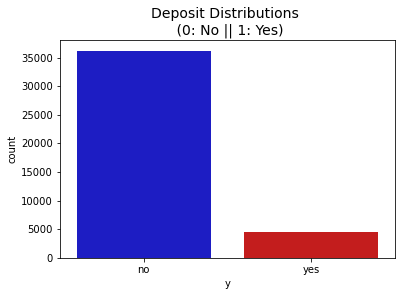

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=df, palette=colors)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

- Looking at the proportion of the classes we like to predict, we see that the dataset is imbalanced. We will take care of this problem with oversampling method.

<AxesSubplot:>

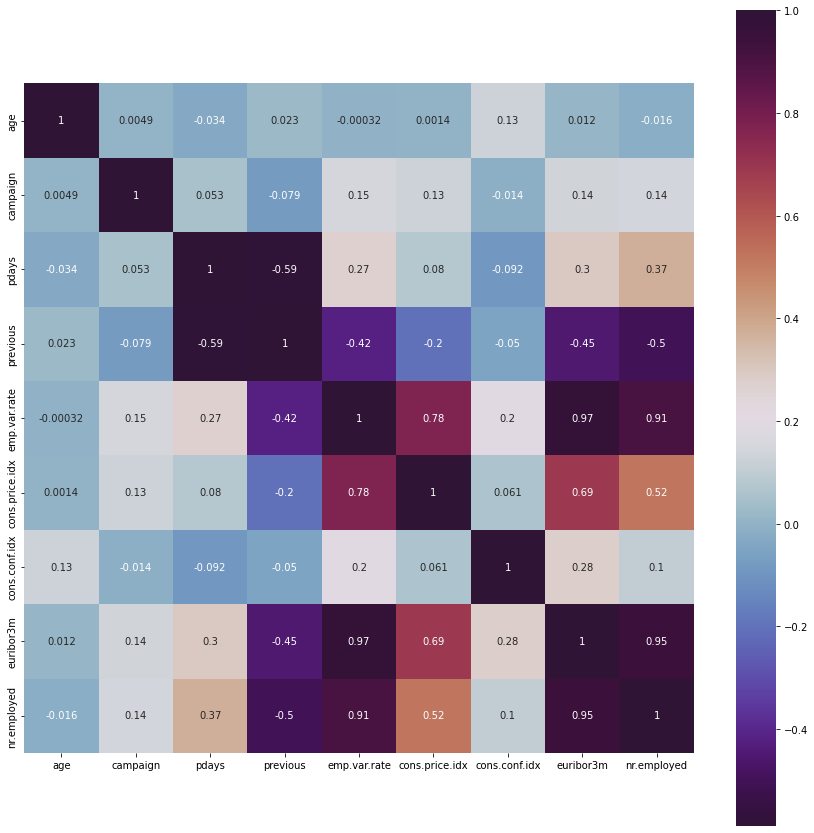

In [11]:
#Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True,cmap= 'twilight_shifted')

- There are highly correlated variables in the dataset. It would be reasonable to perform feature selection

In [12]:
# Basic statistics  of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40767.0,40.021120,10.419903,17.000,32.000,38.000,47.000,98.000
campaign,40775.0,2.566990,2.768760,1.000,1.000,2.000,3.000,56.000
pdays,40739.0,962.340730,187.242913,0.000,999.000,999.000,999.000,999.000
previous,40770.0,0.172823,0.494873,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40770.0,0.082460,1.570749,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40819.0,93.575781,0.578958,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40784.0,-40.504127,4.624825,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,40759.0,3.620653,1.734620,0.634,1.344,4.857,4.961,5.045
nr.employed,40751.0,5167.062656,72.224169,4963.600,5099.100,5191.000,5228.100,5228.100


In [13]:
#subseting catigolical dataset 
objCols = df.select_dtypes(['object']).columns
objCols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

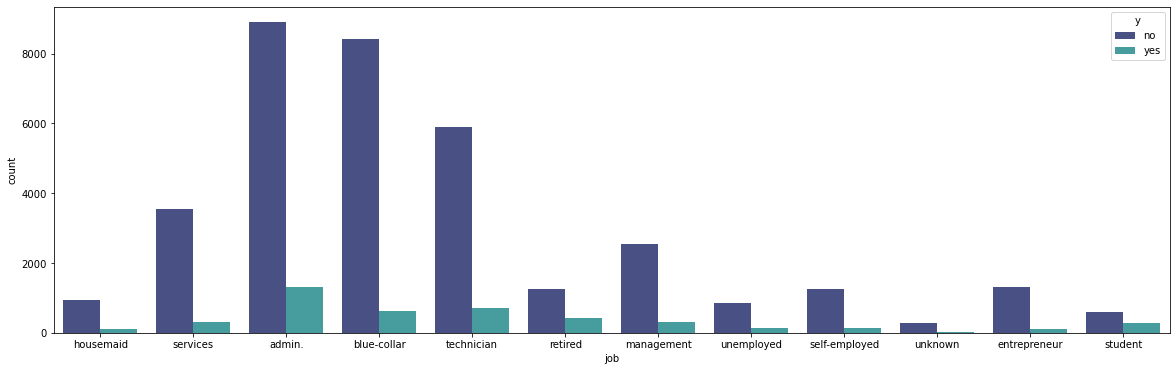

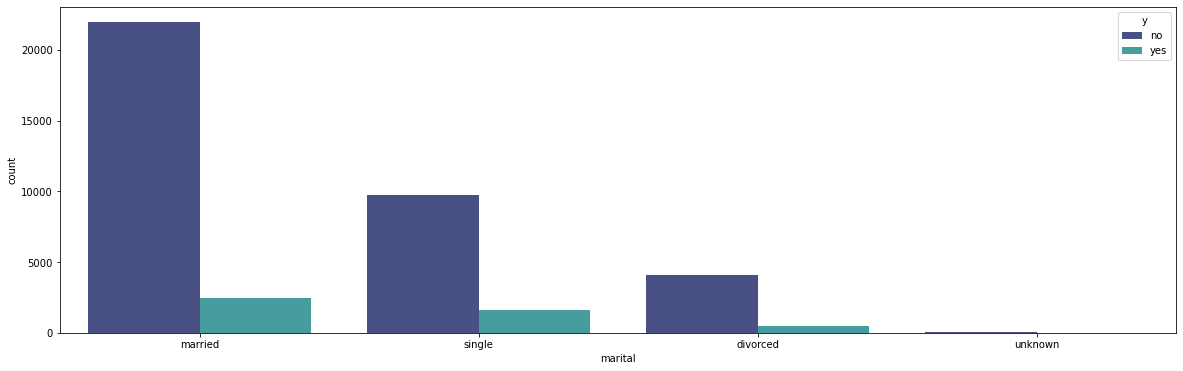

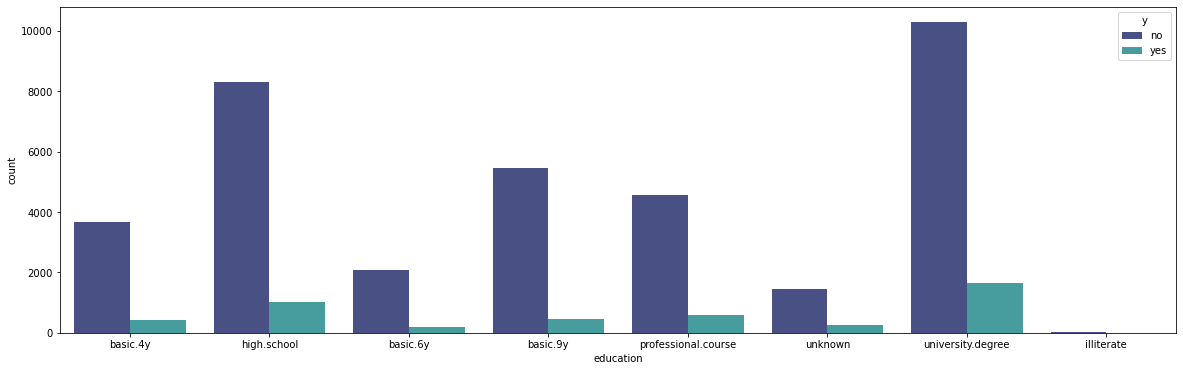

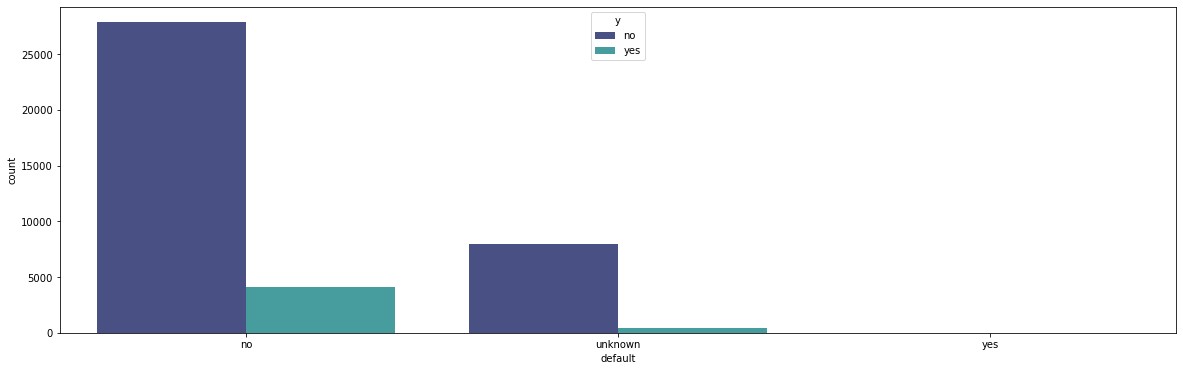

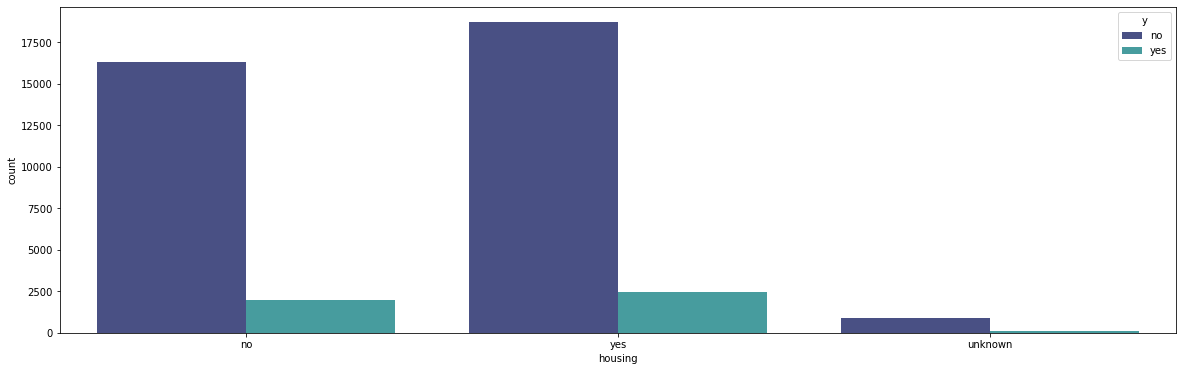

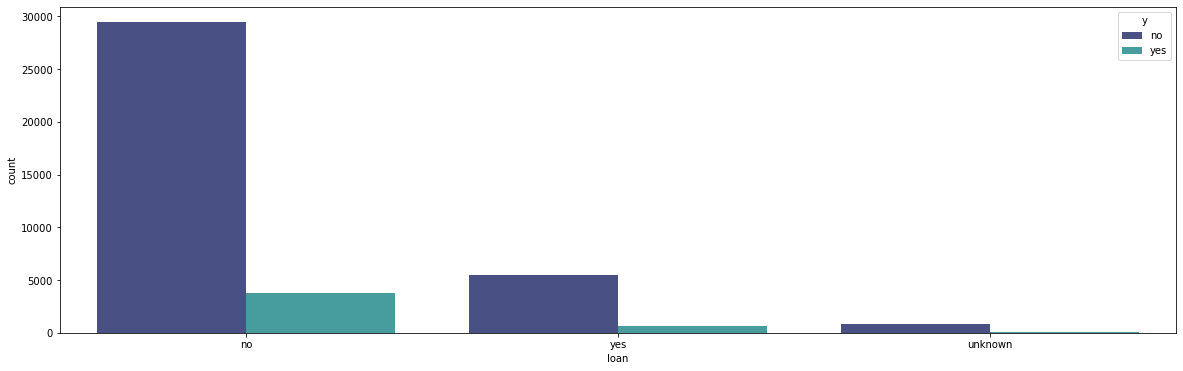

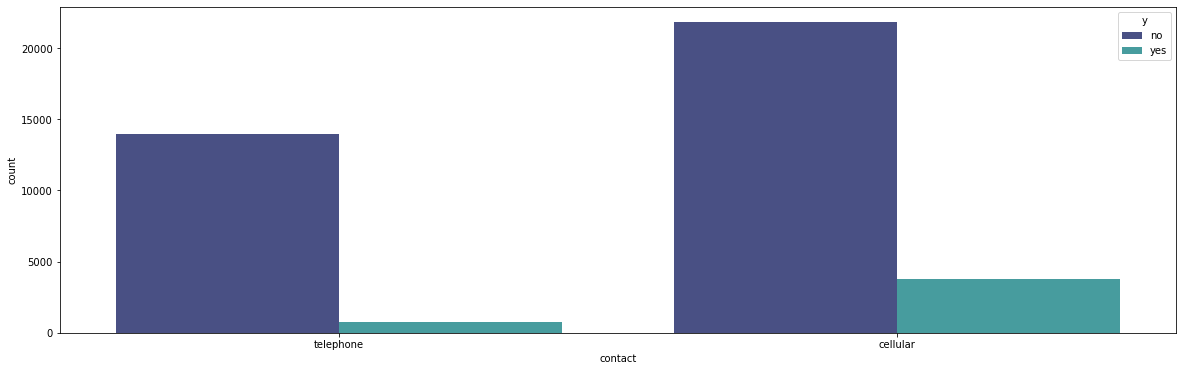

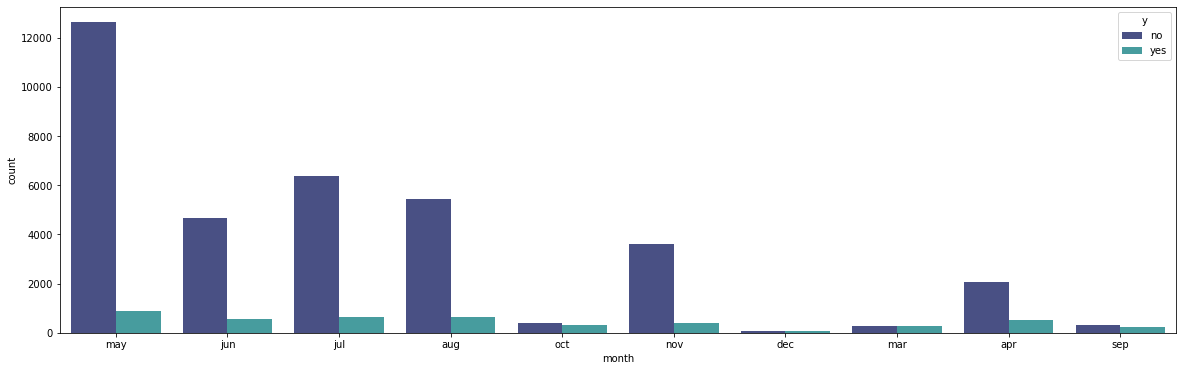

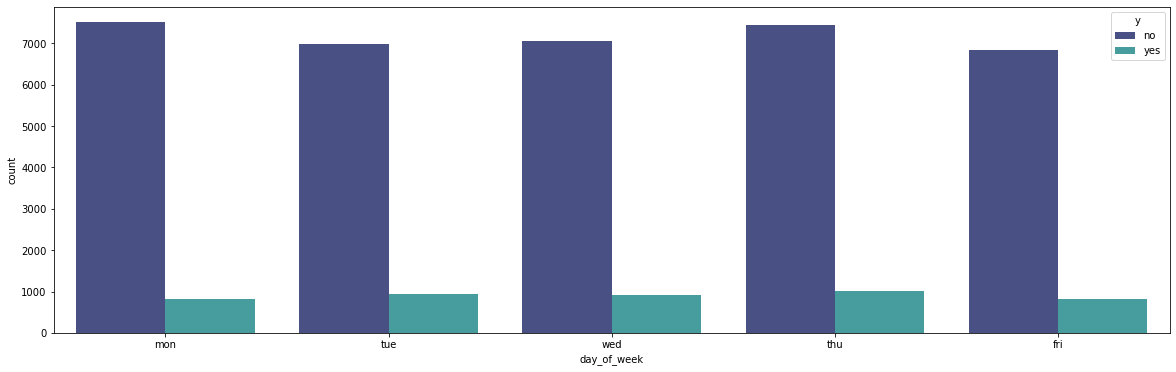

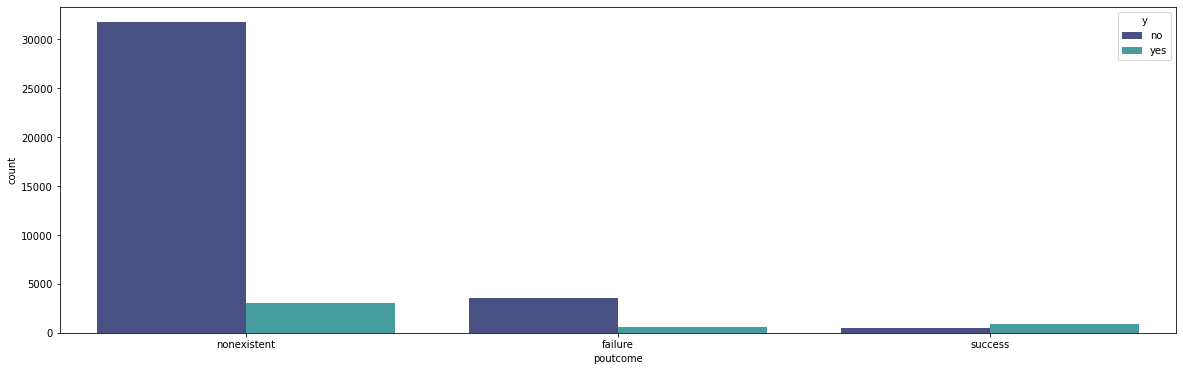

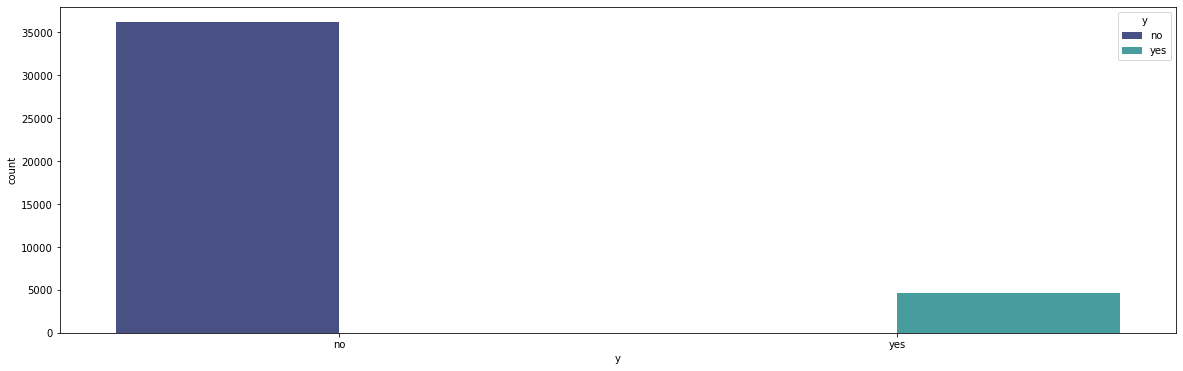

In [14]:
#Categorical Count Plot 
for col in objCols:
    plt.figure(figsize=(20,6))
    sns.countplot(x=col,data=df, palette="mako",hue='y')
    plt.show()

In [15]:
#subseting numeric columns 
numCols = df.select_dtypes([np.number]).columns
numCols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

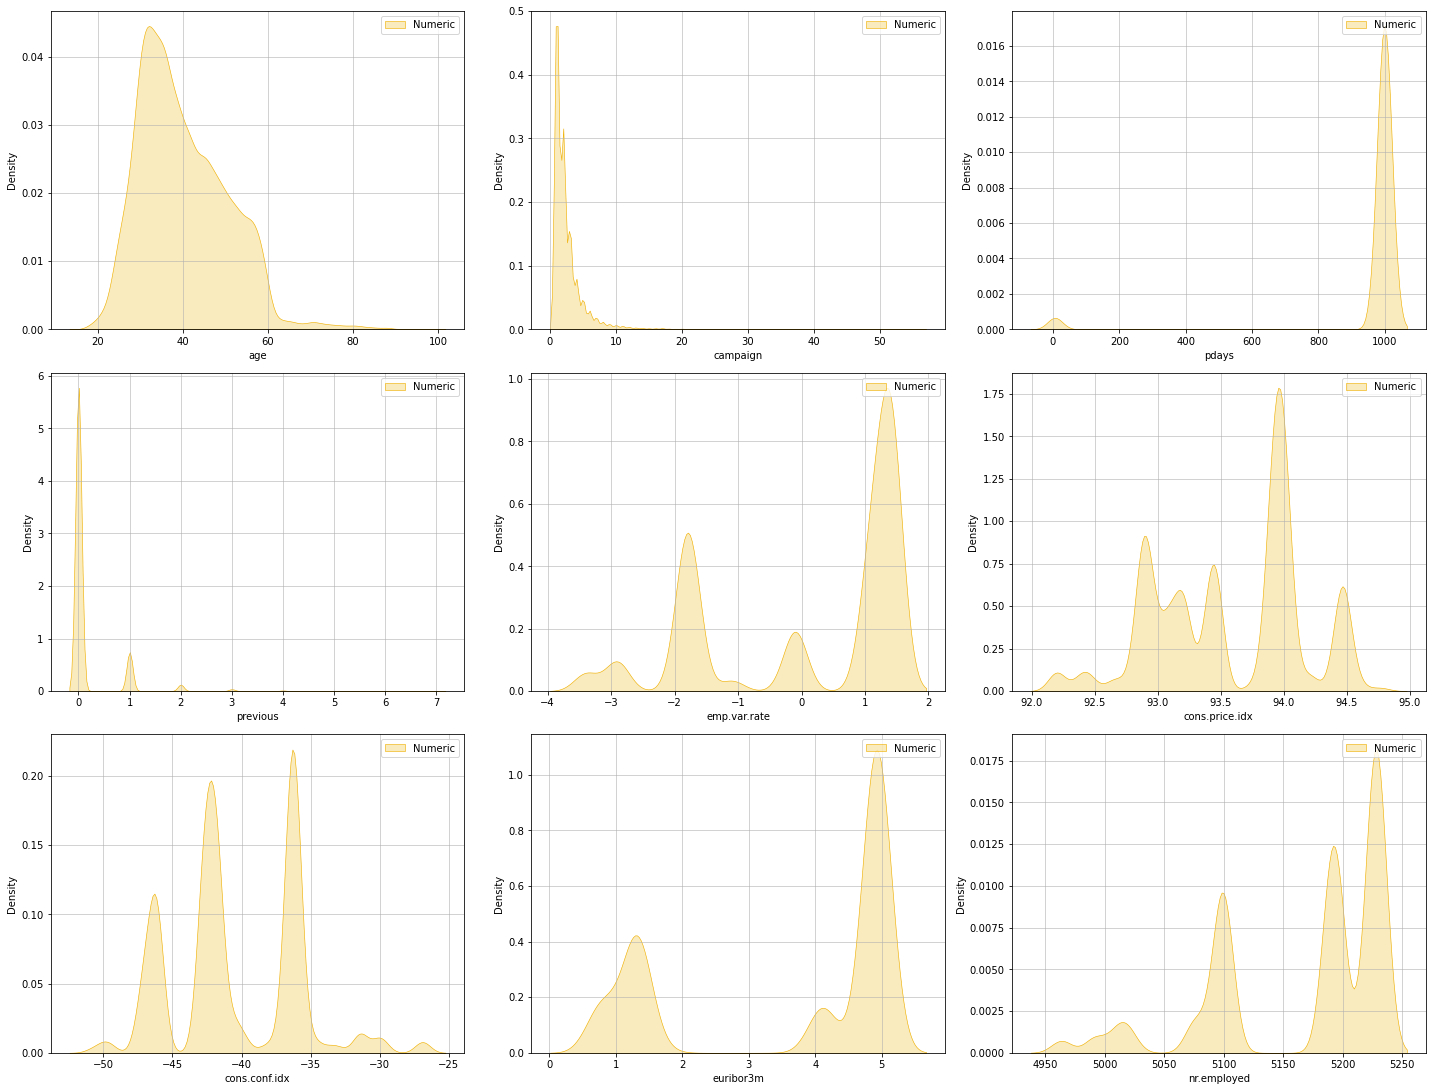

In [16]:
#Feature Distribution
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numCols[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df, label = "Numeric")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

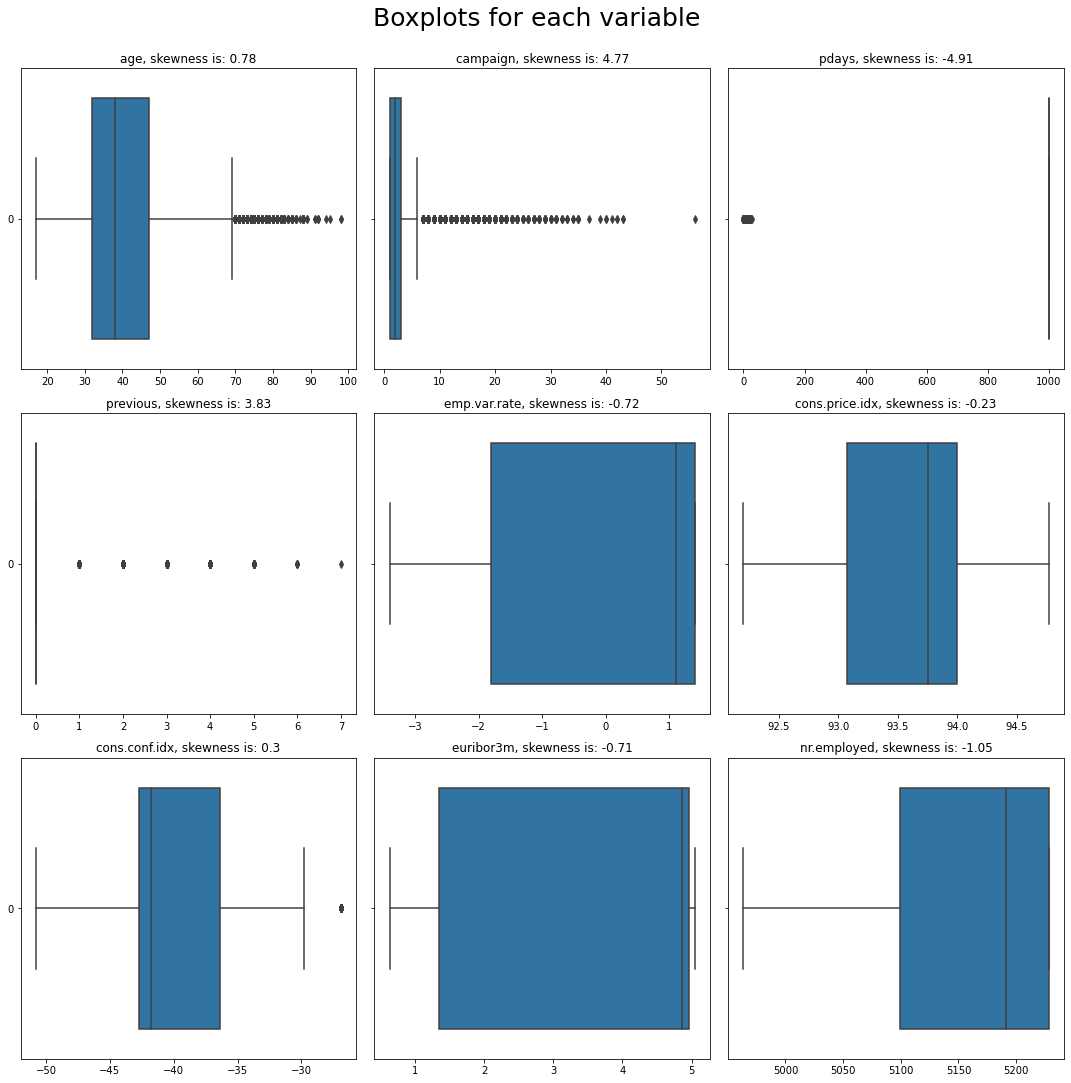

In [17]:
#Checking for outliers in  dataset with boxplot
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,15))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numCols, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

- there are some ouliers in some of the features which needs to be taken care of 

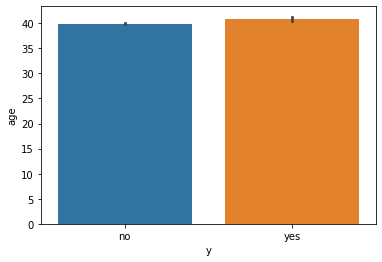

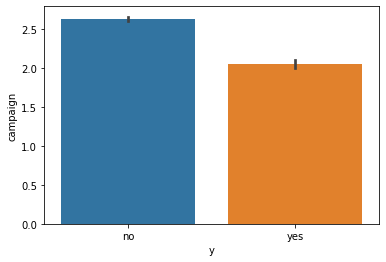

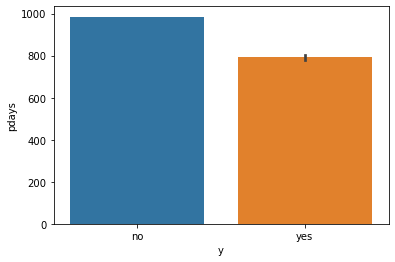

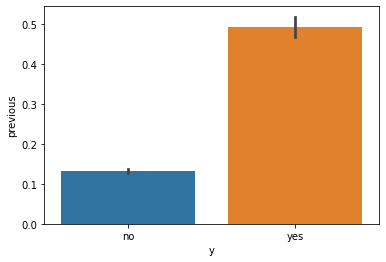

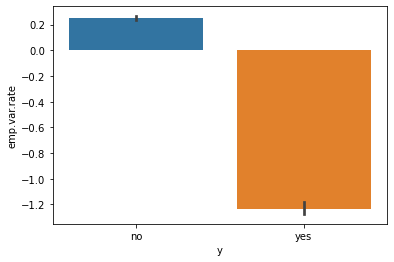

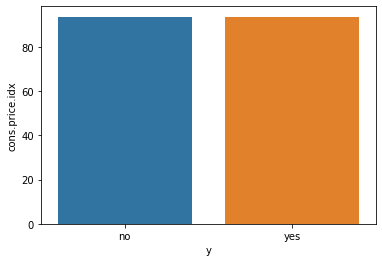

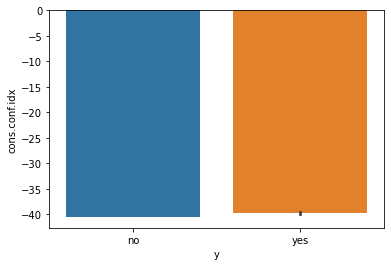

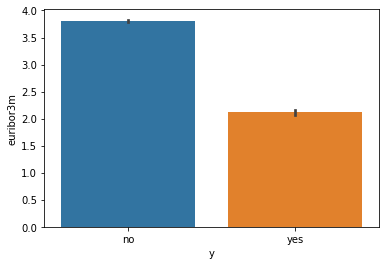

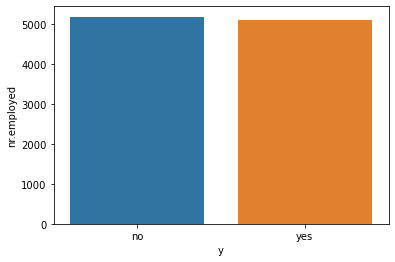

In [18]:
#Visualizing Numerical Features with Deposit
for i in df[numCols]:
    sns.barplot(df.y,df[i])
    plt.show()

In [20]:
cols = df.columns
numCols= df._get_numeric_data().columns
catCols = list(set(cols) - set(numCols))

In [21]:
df[catCols]

,day_of_week,marital,loan,month,education,poutcome,contact,job,default,y,housing
0,mon,married,no,may,basic.4y,nonexistent,telephone,housemaid,no,no,no
1,mon,married,NaN,may,high.school,nonexistent,telephone,services,unknown,no,no
2,mon,married,no,may,high.school,nonexistent,telephone,services,no,no,yes
3,mon,married,no,may,basic.6y,nonexistent,telephone,admin.,no,no,no
4,mon,married,yes,may,high.school,nonexistent,NaN,services,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,fri,married,no,nov,professional.course,nonexistent,cellular,retired,no,yes,yes
41184,fri,married,no,nov,professional.course,nonexistent,cellular,blue-collar,no,no,no
41185,fri,married,no,nov,university.degree,nonexistent,cellular,retired,no,no,yes
41186,fri,married,no,nov,professional.course,nonexistent,cellular,technician,no,yes,no


In [22]:
df[numCols]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1.0,999.0,NaN,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6


## Data Cleaning and Preprocessing

In [23]:
#Calculating How many columns has missing values percentage > 5% 
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent
missing_percent = get_numerical_summary(df)

age : 421 (1.022%)
job : 484 (1.175%)
marital : 413 (1.003%)
education : 424 (1.029%)
default : 391 (0.949%)
housing : 379 (0.92%)
loan : 455 (1.105%)
contact : 440 (1.068%)
month : 421 (1.022%)
day_of_week : 436 (1.059%)
campaign : 413 (1.003%)
pdays : 449 (1.09%)
previous : 418 (1.015%)
poutcome : 431 (1.046%)
emp.var.rate : 418 (1.015%)
cons.price.idx : 369 (0.896%)
cons.conf.idx : 404 (0.981%)
euribor3m : 429 (1.042%)
nr.employed : 437 (1.061%)
y : 398 (0.966%)


In [24]:
import missingno as msno

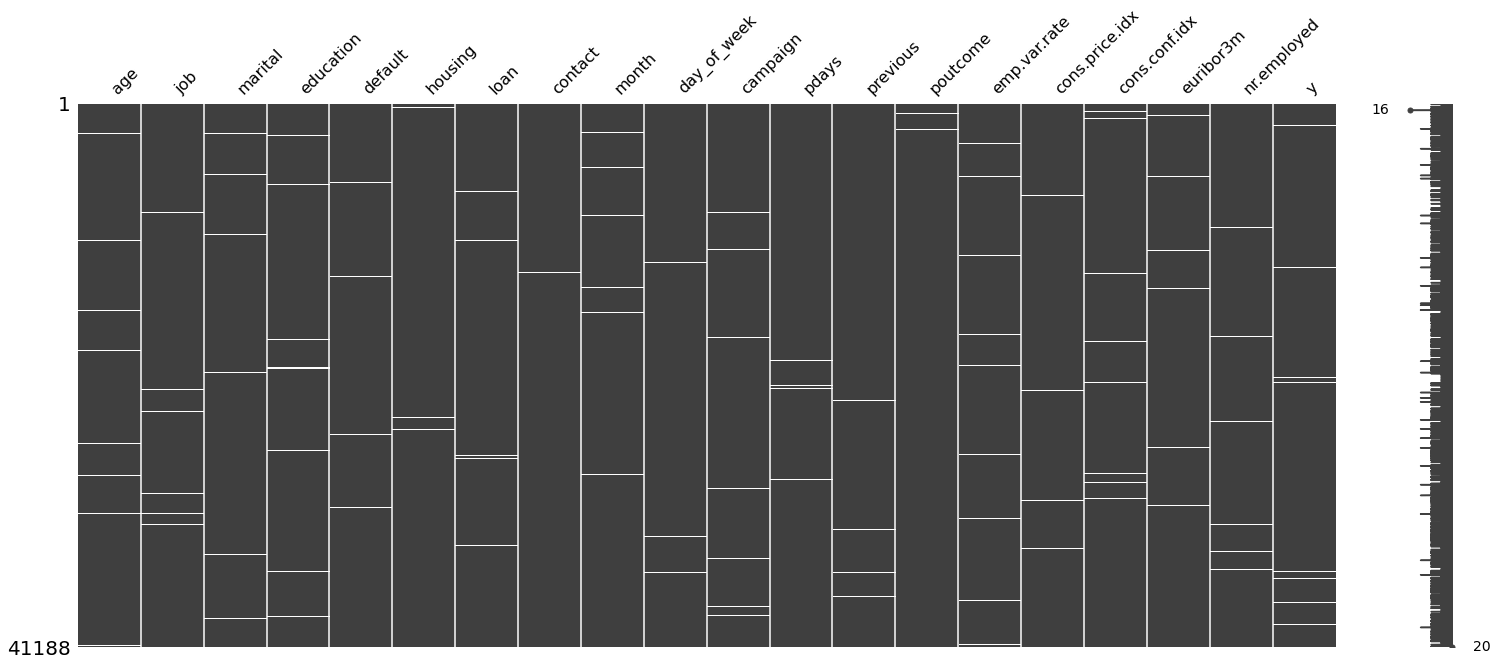

<Figure size 1080x648 with 0 Axes>

In [25]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

-  the count of missing value is negligible I believe I can simply drop those rows


In [26]:
## since the count of missing value is negligible I believe i can simply drop those rows

df.dropna(axis=0,inplace=True)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [27]:
df.shape

(33495, 20)

In [29]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000
mean,40.031169,2.568144,962.180505,0.172981,0.088180,93.577848,-40.494319,3.626998,5167.224693
std,10.415236,2.767520,187.634196,0.494302,1.568515,0.578580,4.623500,1.733061,72.158051
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
df.pdays.value_counts(normalize=True)


999.0    0.962920
3.0      0.010718
6.0      0.010121
4.0      0.003135
9.0      0.001552
2.0      0.001463
10.0     0.001343
12.0     0.001314
7.0      0.001284
5.0      0.001194
13.0     0.000866
1.0      0.000627
15.0     0.000627
11.0     0.000627
14.0     0.000537
8.0      0.000388
0.0      0.000299
16.0     0.000299
17.0     0.000209
18.0     0.000149
22.0     0.000090
21.0     0.000060
19.0     0.000060
25.0     0.000030
26.0     0.000030
27.0     0.000030
20.0     0.000030
Name: pdays, dtype: float64

- pdays variable has the value 999 96% of the time. The variable gives no information since its variance is very low. It is better to drop this variable.

In [31]:
pd.crosstab(df['default'], df.y)


y,no,yes
default,,
no,23014,3432
unknown,6688,358
yes,3,0


- There are only 3 customers which we know for sure that they have a loan in default. Again, this variable gives no information and it will be dropped in a later stage.

In [33]:
df.y.value_counts(normalize=True)


no     0.886849
yes    0.113151
Name: y, dtype: float64

### Standardization

In [34]:
# make a copy of dataset to scaling
bank_scale=df.copy()

# remove 'pdays' and 'default' columns
bank_scale= bank_scale.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
categorical_cols= ['job','marital', 'education',  'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']
feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_cols]

scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [35]:
scaled_data = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1.533241,-0.566633,-0.349955,0.645091,0.719275,0.885558,0.709739,0.329494,0,...,1,0,0,0,1,0,0,0,1,0
1,0,-0.291037,-0.566633,-0.349955,0.645091,0.719275,0.885558,0.709739,0.329494,0,...,1,0,0,0,1,0,0,0,1,0
2,0,-0.002993,-0.566633,-0.349955,0.645091,0.719275,0.885558,0.709739,0.329494,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0.477080,-0.566633,-0.349955,0.645091,0.719275,0.885558,0.709739,0.329494,0,...,1,0,0,0,1,0,0,0,1,0
4,0,1.821285,-0.566633,-0.349955,0.645091,0.719275,0.885558,0.709739,0.329494,0,...,1,0,0,0,1,0,0,0,1,0


## Modeling 

In [37]:
#Train/Test Split
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

### Benchmark Models

In [53]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [54]:
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]
}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train,y_train)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameter for Random Forest {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23} 0.7924131462842089
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 1} 0.8997650909537919
Best Parameter for XGBoost {'gamma': 0.0, 'max_depth': 4, 'min_child_weight': 6} 0.799022087079688


In [55]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4= KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier()

# Instantiate the classfiers and make a list
classifiers = [LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               GaussianNB(), 
               SVC(kernel='linear'),
               DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12),
               RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3),  ('knn', clf4),('lda', clf5), ('xgb', clf6)], voting ='soft')]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy= accuracy_score(y_train, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train,  y_train_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

CPU times: total: 1min 20s
Wall time: 21.6 s


In [56]:
result_table.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
LinearDiscriminantAnalysis,"[0.0, 0.046848381601362864, 1.0]","[0.0, 0.37619893428063944, 1.0]","[0.0, 0.03932963914042438, 1.0]","[0.0, 0.3682051282051282, 1.0]",0.888500,0.891689,0.664675,0.664438,0.441846,0.552308,0.368205,"[[7108, 291], [616, 359]]","{'0': {'precision': 0.9202485758674263, 'recal..."
KNeighborsClassifier,"[0.0, 0.01977046534564691, 1.0]","[0.0, 0.39182948490230907, 1.0]","[0.0, 0.027030679821597514, 1.0]","[0.0, 0.2564102564102564, 1.0]",0.914295,0.889539,0.686030,0.614690,0.350877,0.555556,0.256410,"[[7199, 200], [725, 250]]","{'0': {'precision': 0.9085058051489147, 'recal..."
GaussianNB,"[0.0, 0.08302698825428136, 1.0]","[0.0, 0.44760213143872113, 1.0]","[0.0, 0.07703743749155291, 1.0]","[0.0, 0.442051282051282, 1.0]",0.864376,0.866969,0.682288,0.682507,0.436235,0.430569,0.442051,"[[6829, 570], [544, 431]]","{'0': {'precision': 0.9262172792621728, 'recal..."
SVC,"[0.0, 0.013897606025284677, 1.0]","[0.0, 0.19040852575488454, 1.0]","[0.0, 0.011758345722394918, 1.0]","[0.0, 0.19794871794871796, 1.0]",0.896939,0.896226,0.588255,0.593095,0.307570,0.689286,0.197949,"[[7312, 87], [782, 193]]","{'0': {'precision': 0.9033852236224363, 'recal..."
DecisionTreeClassifier,"[0.0, 0.011431901730476104, 1.0]","[0.0, 0.24120781527531082, 1.0]","[0.0, 0.013109879713474794, 1.0]","[0.0, 0.23282051282051283, 1.0]",0.904821,0.899092,0.614888,0.609855,0.349500,0.700617,0.232821,"[[7302, 97], [748, 227]]","{'0': {'precision': 0.9070807453416149, 'recal..."
RandomForestClassifier,"[0.0, 0.00403478884605039, 1.0]","[0.0, 0.4483126110124334, 1.0]","[0.0, 0.017029328287606435, 1.0]","[0.0, 0.25333333333333335, 1.0]",0.934597,0.898018,0.722139,0.618152,0.366469,0.662198,0.253333,"[[7273, 126], [728, 247]]","{'0': {'precision': 0.9090113735783028, 'recal..."
XGBClassifier,"[0.0, 0.011611225679189456, 1.0]","[0.0, 0.3147424511545293, 1.0]","[0.0, 0.017029328287606435, 1.0]","[0.0, 0.26256410256410256, 1.0]",0.912902,0.899092,0.651566,0.622767,0.377303,0.670157,0.262564,"[[7273, 126], [719, 256]]","{'0': {'precision': 0.910035035035035, 'recall..."
Model Ensemble,"[0.0, 0.0069488030126423385, 1.0]","[0.0, 0.5435168738898757, 1.0]","[0.0, 0.030274361400189215, 1.0]","[0.0, 0.3282051282051282, 1.0]",0.942677,0.895032,0.768284,0.648965,0.421330,0.588235,0.328205,"[[7175, 224], [655, 320]]","{'0': {'precision': 0.9163473818646233, 'recal..."


In [57]:
pd.DataFrame(result_table.iloc[0,12]).transpose()


,precision,recall,f1-score,support
0,0.920249,0.960670,0.940025,7399.000000
1,0.552308,0.368205,0.441846,975.000000
accuracy,0.891689,0.891689,0.891689,0.891689
macro avg,0.736278,0.664438,0.690936,8374.000000
weighted avg,0.877409,0.891689,0.882021,8374.000000


In [ ]:
fig = plt.figure(figsize=(15,10))

for i in range(result_table.shape[0]):
    plt.plot(result_table.iloc[i,]['fpr'], 
             result_table.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

### Oversampling - RandomOverSampler

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') 
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

Before OverSampling, counts of label '1': 2815
Before OverSampling, counts of label '0': 22306 

After OverSampling, the shape of X_train: (44612, 49)
After OverSampling, the shape of y_train: (44612,) 

After OverSampling, counts of label '1': 22306
After OverSampling, counts of label '0': 22306


In [60]:
# Tuning parameter for RF 
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train_over,y_train_over)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train_over,y_train_over)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train_over,y_train_over)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameter for Random Forest {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45} 0.9965124076731845
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 1} 0.7606922980387523
Best Parameter for XGBoost {'gamma': 0.4, 'max_depth': 6, 'min_child_weight': 4} 0.8839130381602359


In [61]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier()

# Instantiate the classfiers and make a list
classifiers = [LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               GaussianNB(), 
               SVC(kernel='linear'),
               DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=5,min_samples_leaf=1, random_state=12),
               RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=45, min_samples_split=5, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3), ('knn', clf4), ('lda', clf5), ('xgb', clf6)], voting ='soft')]

# Define a result table as a DataFrame
result_table1 = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    y_train_pred = model.predict(X_train_over)
    y_test_pred = model.predict(X_test)
    
    train_accuracy= accuracy_score(y_train_over, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train_over,  y_train_pred)
    
    train_auc = roc_auc_score(y_train_over, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

CPU times: total: 7min 20s
Wall time: 5min 27s


In [62]:
result_table1.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table1

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
LinearDiscriminantAnalysis,"[0.0, 0.15897068053438537, 1.0]","[0.0, 0.6356585672016498, 1.0]","[0.0, 0.15029057980808216, 1.0]","[0.0, 0.637948717948718, 1.0]",0.738344,0.825054,0.738344,0.743829,0.459210,0.358708,0.637949,"[[6287, 1112], [353, 622]]","{'0': {'precision': 0.9468373493975903, 'recal..."
KNeighborsClassifier,"[0.0, 0.1512597507397113, 1.0]","[0.0, 0.9995068591410383, 1.0]","[0.0, 0.19421543451817813, 1.0]","[0.0, 0.5671794871794872, 1.0]",0.924124,0.778003,0.924124,0.686482,0.373019,0.277889,0.567179,"[[5962, 1437], [422, 553]]","{'0': {'precision': 0.9338972431077694, 'recal..."
GaussianNB,"[0.0, 0.11144983412534744, 1.0]","[0.0, 0.4808123374876715, 1.0]","[0.0, 0.10339235031761049, 1.0]","[0.0, 0.48, 1.0]",0.684681,0.848101,0.684681,0.688304,0.423913,0.379562,0.480000,"[[6634, 765], [507, 468]]","{'0': {'precision': 0.9290015404005041, 'recal..."
SVC,"[0.0, 0.13776562359903166, 1.0]","[0.0, 0.6010938760871515, 1.0]","[0.0, 0.12880118934991214, 1.0]","[0.0, 0.6143589743589744, 1.0]",0.731664,0.841294,0.731664,0.742779,0.474080,0.385954,0.614359,"[[6446, 953], [376, 599]]","{'0': {'precision': 0.9448841981823513, 'recal..."
DecisionTreeClassifier,"[0.0, 0.11037389043306733, 1.0]","[0.0, 0.6488837084192594, 1.0]","[0.0, 0.11055548047033383, 1.0]","[0.0, 0.5846153846153846, 1.0]",0.769255,0.853953,0.769255,0.737030,0.482438,0.410663,0.584615,"[[6581, 818], [405, 570]]","{'0': {'precision': 0.9420269109647867, 'recal..."
RandomForestClassifier,"[0.0, 0.005648704384470546, 1.0]","[0.0, 1.0, 1.0]","[0.0, 0.04879037707798351, 1.0]","[0.0, 0.38564102564102565, 1.0]",0.997176,0.885359,0.997176,0.668425,0.439252,0.510176,0.385641,"[[7038, 361], [599, 376]]","{'0': {'precision': 0.9215660599711929, 'recal..."
XGBClassifier,"[0.0, 0.1396036940733435, 1.0]","[0.0, 0.6689231596879763, 1.0]","[0.0, 0.1336667117177997, 1.0]","[0.0, 0.6358974358974359, 1.0]",0.764660,0.839503,0.764660,0.751115,0.479876,0.385333,0.635897,"[[6410, 989], [355, 620]]","{'0': {'precision': 0.9475240206947524, 'recal..."
Model Ensemble,"[0.0, 0.04438267730655429, 1.0]","[0.0, 0.996682506948803, 1.0]","[0.0, 0.07636167049601297, 1.0]","[0.0, 0.518974358974359, 1.0]",0.976150,0.876523,0.976150,0.721306,0.494624,0.472456,0.518974,"[[6834, 565], [469, 506]]","{'0': {'precision': 0.9357798165137615, 'recal..."


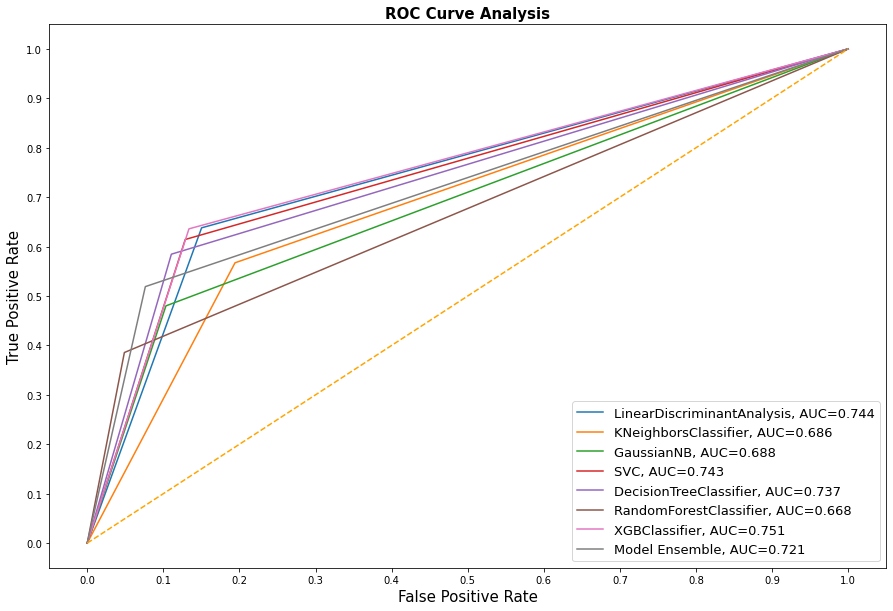

In [63]:
fig = plt.figure(figsize=(15,10))

for i in range(result_table1.shape[0]):
    plt.plot(result_table1.iloc[i,]['fpr'], 
             result_table1.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table1.index[i], result_table1.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

### Results

In [64]:
# Baseline Model
result_table.iloc[:,[4,5,6,7,8,9,10]]

,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall
classifiers,,,,,,,
LinearDiscriminantAnalysis,0.888500,0.891689,0.664675,0.664438,0.441846,0.552308,0.368205
KNeighborsClassifier,0.914295,0.889539,0.686030,0.614690,0.350877,0.555556,0.256410
GaussianNB,0.864376,0.866969,0.682288,0.682507,0.436235,0.430569,0.442051
SVC,0.896939,0.896226,0.588255,0.593095,0.307570,0.689286,0.197949
DecisionTreeClassifier,0.904821,0.899092,0.614888,0.609855,0.349500,0.700617,0.232821
RandomForestClassifier,0.934597,0.898018,0.722139,0.618152,0.366469,0.662198,0.253333
XGBClassifier,0.912902,0.899092,0.651566,0.622767,0.377303,0.670157,0.262564
Model Ensemble,0.942677,0.895032,0.768284,0.648965,0.421330,0.588235,0.328205


In [65]:
# Oversampling with RandomOverSampler
result_table1.iloc[:,[4,5,6,7,8,9,10]]

,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall
classifiers,,,,,,,
LinearDiscriminantAnalysis,0.738344,0.825054,0.738344,0.743829,0.459210,0.358708,0.637949
KNeighborsClassifier,0.924124,0.778003,0.924124,0.686482,0.373019,0.277889,0.567179
GaussianNB,0.684681,0.848101,0.684681,0.688304,0.423913,0.379562,0.480000
SVC,0.731664,0.841294,0.731664,0.742779,0.474080,0.385954,0.614359
DecisionTreeClassifier,0.769255,0.853953,0.769255,0.737030,0.482438,0.410663,0.584615
RandomForestClassifier,0.997176,0.885359,0.997176,0.668425,0.439252,0.510176,0.385641
XGBClassifier,0.764660,0.839503,0.764660,0.751115,0.479876,0.385333,0.635897
Model Ensemble,0.976150,0.876523,0.976150,0.721306,0.494624,0.472456,0.518974


### Feature Importance and SHAP Values

In [66]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27)
model_xgb = xgb.fit(X_train_over, y_train_over)
y_train_xgb = model_xgb.predict(X_train_over)
y_test_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test,y_test_xgb))
print(classification_report(y_test,y_test_xgb, digits=3))

print('Train accuracy: %0.3f' % accuracy_score(y_train_over, y_train_xgb))
print('Test accuracy: %0.3f' % accuracy_score(y_test, y_test_xgb))

print('Train AUC: %0.3f' % roc_auc_score(y_train_over, y_train_xgb))
print('Test AUC: %0.3f' % roc_auc_score(y_test, y_test_xgb))

[[6410  989]
 [ 355  620]]
              precision    recall  f1-score   support

           0      0.948     0.866     0.905      7399
           1      0.385     0.636     0.480       975

    accuracy                          0.840      8374
   macro avg      0.666     0.751     0.692      8374
weighted avg      0.882     0.840     0.856      8374

Train accuracy: 0.765
Test accuracy: 0.840
Train AUC: 0.765
Test AUC: 0.751


In [67]:
import shap
expl_xgb = shap.TreeExplainer(model_xgb)
shap_xgb = expl_xgb.shap_values(X_train_over)

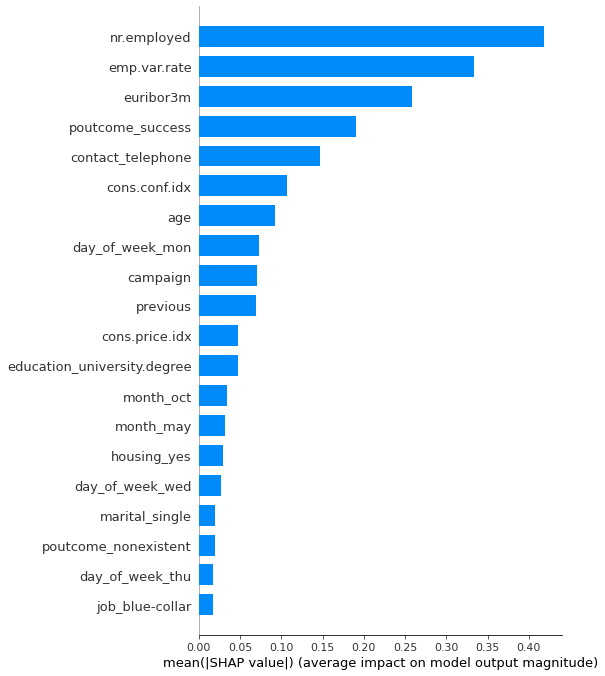

In [68]:
shap.summary_plot(shap_xgb, X_train_over, plot_type="bar")


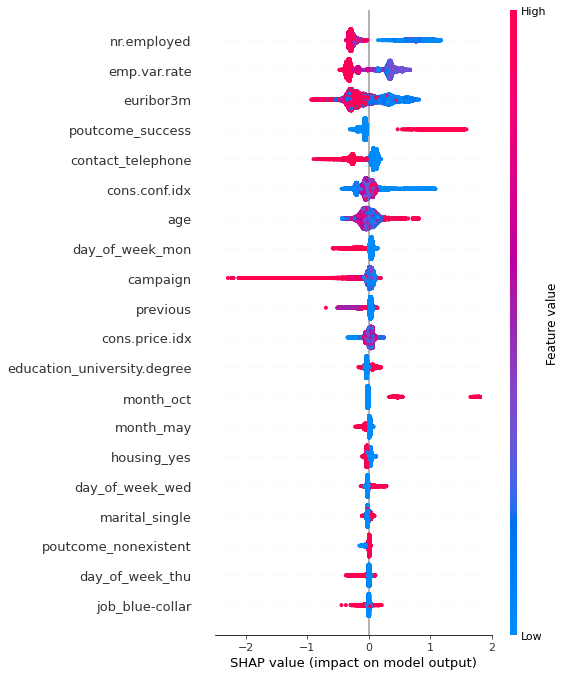

In [69]:
shap.summary_plot(shap_xgb, X_train_over)


In [70]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[1050,:], X_train_over.iloc[1050,:], link='logit')

In [71]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[4000,:], X_train_over.iloc[4000,:], link='logit')

In [72]:
# base value
y_train_over.mean()

0.5

In [73]:
X_train_over.iloc[4000,]

age                              0.285051
campaign                        -0.566633
previous                        -0.349955
emp.var.rate                     0.836358
cons.price.idx                   0.587917
cons.conf.idx                   -0.477066
euribor3m                        0.769172
nr.employed                      0.843651
job_blue-collar                  0.000000
job_entrepreneur                 0.000000
job_housemaid                    0.000000
job_management                   0.000000
job_retired                      0.000000
job_self-employed                0.000000
job_services                     0.000000
job_student                      0.000000
job_technician                   0.000000
job_unemployed                   0.000000
job_unknown                      0.000000
marital_married                  1.000000
marital_single                   0.000000
marital_unknown                  0.000000
education_basic.6y               0.000000
education_basic.9y               0